In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import laspy
import os

In [33]:
save_path = "/home/admin_2qdjwp3/Arun/stem_leaf_classifier_dataset_LassiData.pkl"
with open(save_path, 'rb') as f:
    data = pickle.load(f)

In [34]:
data['labels'][0]

array([2, 2, 2, ..., 1, 1, 1], shape=(195863,), dtype=uint8)

In [35]:
data['data'][0].shape

(195863, 4)

In [36]:
data['data'][1].shape

(29638, 4)

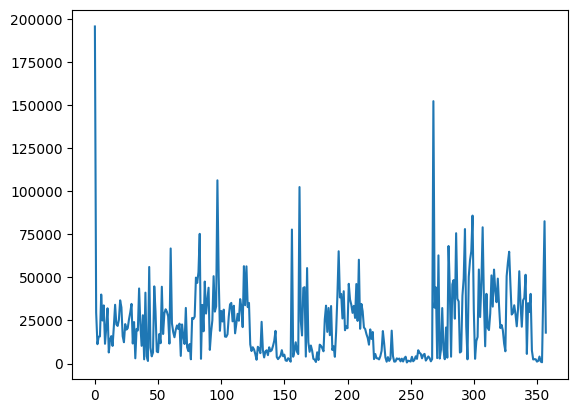

49410.0


In [37]:
point_lengths = np.array([tree.shape[0] for tree in data['data']])
plt.plot(point_lengths)
plt.show()

print(np.percentile(point_lengths, 90))

In [40]:
write_folder = "/home/admin_2qdjwp3/Arun/Data/"
for (tree_idx, tree), (label_idx, label) in zip(enumerate(data['data']), enumerate(data['labels'])):
    las = laspy.LasData(laspy.LasHeader(version="1.4", point_format=6))
    las.x = tree[:, 0]
    las.y = tree[:, 1]
    las.z = tree[:, 2]
    las.intensity = tree[:, 3]
    #print(np.unique(label))
    las.classification = label
    las.write(os.path.join(write_folder, f"{tree_idx}_tree.las"))


In [7]:
save_path = "/home/admin_2qdjwp3/Arun/stem_leaf_classifier_dataset_LassiData_train.pkl"
with open(save_path, 'rb') as f:
    data = pickle.load(f)
    

In [8]:
data['data'][0].shape

(15000, 4)

In [14]:
np.count_nonzero(data['labels'][0])

np.int64(871)

In [15]:
np.unique(data['labels'][0])

array([0, 1], dtype=uint8)